# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
cities

['yellowknife',
 'albany',
 'georgetown',
 "verkhotur'ye",
 'laguna',
 'iqaluit',
 'saint-philippe',
 'nuestra senora del rosario de caa cati',
 'ust-tsilma',
 'aasiaat',
 'anna regina',
 'fort bragg',
 'poyarkovo',
 'adrar',
 'atafu village',
 'tolanaro',
 'port-aux-francais',
 'whitehorse',
 'port mathurin',
 'margaret river',
 'flin flon',
 'kui buri',
 'puerto natales',
 'fale old settlement',
 'port elizabeth',
 'shani',
 'callao',
 'portland',
 'ushuaia',
 'san-pedro',
 'vorgashor',
 'bethel',
 'punta arenas',
 'kayes',
 'ust-nera',
 'sofifi',
 'edinburgh of the seven seas',
 'reyes',
 'ta`u',
 'maitum',
 'wuxue',
 'adamstown',
 'padang',
 'shushtar',
 'acapulco de juarez',
 'wailua homesteads',
 'invercargill',
 'alto barinas',
 'carnarvon',
 'nova vicosa',
 'ribeira grande',
 'cole harbour',
 'tinogasta',
 'okotoks',
 'howrah',
 'lebu',
 'pietermaritzburg',
 'ouellah',
 'deir ez-zor',
 'grytviken',
 'port lincoln',
 "kapa'a",
 'utrik',
 'pisco',
 'jayrud',
 'waitangi',
 'puerto

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
#     print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#       Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon'] 
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ["wind"]['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | verkhotur'ye
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | nuestra senora del rosario de caa cati
Processing Record 9 of Set 1 | ust-tsilma
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | anna regina
Processing Record 12 of Set 1 | fort bragg
Processing Record 13 of Set 1 | poyarkovo
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | flin flon
Processing Recor

Processing Record 37 of Set 4 | lagunas
Processing Record 38 of Set 4 | caister-on-sea
Processing Record 39 of Set 4 | san salvador
Processing Record 40 of Set 4 | bathurst
Processing Record 41 of Set 4 | eydhafushi
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | usinsk
Processing Record 44 of Set 4 | arkhangel'sk
Processing Record 45 of Set 4 | howard springs
Processing Record 46 of Set 4 | aykhal
Processing Record 47 of Set 4 | alotau
City not found. Skipping...
Processing Record 48 of Set 4 | purificacion
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | pasuquin
Processing Record 1 of Set 5 | ikwiriri
Processing Record 2 of Set 5 | checker hall
City not found. Skipping...
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | villa ocampo
Processing Record 5 of Set 5 | fort mcmurray
Processing Record 6 of Set 5 | phan rang-thap cham
Processing Record 7 of Set 5 | kosh-agach
Processing Record 8 of Set 5 | mineiros
Processi

Processing Record 28 of Set 8 | nagqu
Processing Record 29 of Set 8 | santa cruz cabralia
Processing Record 30 of Set 8 | wanning
Processing Record 31 of Set 8 | talara
Processing Record 32 of Set 8 | salekhard
Processing Record 33 of Set 8 | kachia
Processing Record 34 of Set 8 | bath
Processing Record 35 of Set 8 | aljezur
Processing Record 36 of Set 8 | the bottom
Processing Record 37 of Set 8 | ugoofaaru
Processing Record 38 of Set 8 | carolina
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | remire-montjoly
Processing Record 41 of Set 8 | jatai
Processing Record 42 of Set 8 | prado
Processing Record 43 of Set 8 | nuuk
Processing Record 44 of Set 8 | amungan
Processing Record 45 of Set 8 | guerrero negro
Processing Record 46 of Set 8 | herkimer
Processing Record 47 of Set 8 | xinmin
Processing Record 48 of Set 8 | nemuro
Processing Record 49 of Set 8 | lesnoy
Processing Record 0 of Set 9 | nanning
Processing Record 1 of Set 9 | iskateley
Processing Record 2 of S

Processing Record 22 of Set 12 | uzhur
Processing Record 23 of Set 12 | bathsheba
Processing Record 24 of Set 12 | kete krachi
Processing Record 25 of Set 12 | neiafu
Processing Record 26 of Set 12 | loen
Processing Record 27 of Set 12 | ghat
Processing Record 28 of Set 12 | jinotega
Processing Record 29 of Set 12 | gadzhiyevo
Processing Record 30 of Set 12 | sibiti
Processing Record 31 of Set 12 | cooper's town
Processing Record 32 of Set 12 | muskegon
Processing Record 33 of Set 12 | inirida
Processing Record 34 of Set 12 | murzuq
Processing Record 35 of Set 12 | kudahuvadhoo
Processing Record 36 of Set 12 | general mosconi
Processing Record 37 of Set 12 | ispir
Processing Record 38 of Set 12 | khanty-mansiysk
Processing Record 39 of Set 12 | kuqa
Processing Record 40 of Set 12 | yanjiang
Processing Record 41 of Set 12 | ibresi
Processing Record 42 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 43 of Set 12 | waingapu
Processing Record 44 of Set 12 | kromy
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,293.46,66,75,6.71,CA,1692827257
1,albany,42.6001,-73.9662,298.48,48,52,1.20,US,1692827116
2,georgetown,5.4112,100.3354,300.11,96,40,2.06,MY,1692827036
3,verkhotur'ye,58.8627,60.8054,281.72,81,61,3.74,RU,1692827563
4,laguna,38.4210,-121.4238,310.01,29,0,3.60,US,1692827563


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,293.46,66,75,6.71,CA,1692827257
1,albany,42.6001,-73.9662,298.48,48,52,1.20,US,1692827116
2,georgetown,5.4112,100.3354,300.11,96,40,2.06,MY,1692827036
3,verkhotur'ye,58.8627,60.8054,281.72,81,61,3.74,RU,1692827563
4,laguna,38.4210,-121.4238,310.01,29,0,3.60,US,1692827563


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

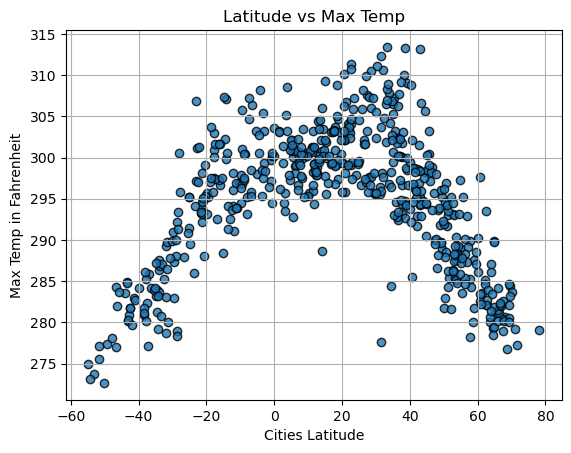

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title('Latitude vs Max Temp')
plt.xlabel('Cities Latitude')
plt.ylabel('Max Temp in Fahrenheit')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

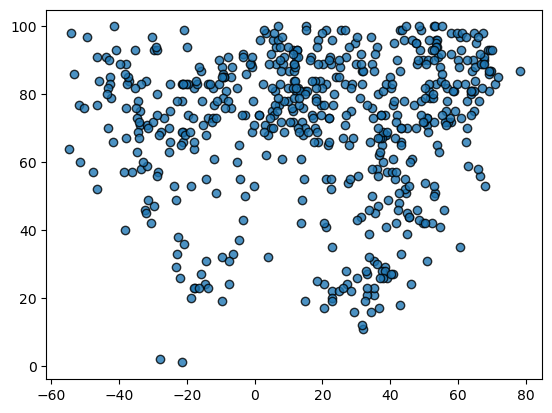

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
# plt.show()

#### Latitude Vs. Cloudiness

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE